Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

/Users/megumisano/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/Users/megumisano/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4785: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/megumisano/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/Users/megumisano/anaconda/lib/python3.6/site-packag

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [29]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "vae"

z_size=32

split = int(0.8 * 200)

In [27]:
filelist = os.listdir(DATA_DIR)

In [30]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist[split:])))["obs"] # 160 because test 
obs = obs.astype(np.float32)/255.0

In [31]:
obs.shape

(1000, 64, 64, 3)

### Loading pretrained VAE, retrained VAE, and ResNet50 

In [36]:
# Pretrained VAE 
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


In [ ]:
# Retrained VAE 
vae_new = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae_new.load_json(os.path.join('tf_vae', 'vae_new.json'))

### Calculate reconstruction loss on test set 

In [ ]:
# Helper function for calculating reconstruction loss 
def reconstruct_loss(x, y):
    return np.mean(np.sum(
          np.square(frame - reconstruct)))

In [ ]:
### Evaluating pretrained VAE model on reconstruction loss
num_samples = 1000 # Evaluating on 1000 takes 3 seconds 
reconstruct_losses = []
for i in range(num_samples):
    frame = random.choice(obs).reshape(1, 64, 64, 3)
    batch_z = vae.encode(frame)
    reconstruct = vae.decode(batch_z)
    r_loss = reconstruct_loss(frame, reconstruct)
    reconstruct_losses.append(r_loss)

In [ ]:
# Pretrained VAE tested on our test set 
np.mean(reconstruct_losses)

In [ ]:
### Evaluating newly trained VAE model on reconstruction loss
num_samples = 1000 # Evaluating on 1000 takes 3 seconds 
reconstruct_losses_new = []
for i in range(num_samples):
    frame = random.choice(obs).reshape(1, 64, 64, 3)
    batch_z = vae_new.encode(frame)
    reconstruct = vae.decode(batch_z)
    r_loss = reconstruct_loss(frame, reconstruct)
    reconstruct_losses_new.append(r_loss)

In [ ]:
# Newly trained VAE tested on our test set 
np.mean(reconstruct_losses_new)

### Qualitative analysis: reconstructed frames

In [ ]:
# Choose a random frame 
frame = random.choice(obs).reshape(1, 64, 64, 3)

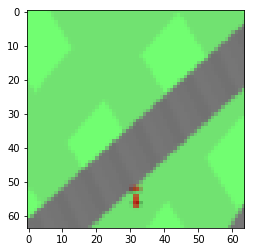

In [55]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [56]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 0.6175 -0.2372  0.7066  0.559   0.1523 -0.6522  1.9095  0.1713 -1.5639  0.9928 -0.5545 -0.0943
 -0.9318  0.6406  0.9181  1.9743  0.3187  0.629   1.0405  0.4965 -0.4942  1.1771  0.1061  0.6423
 -0.2047  0.9658 -0.0418 -1.5811 -1.444  -0.7784  0.404  -0.396 ]


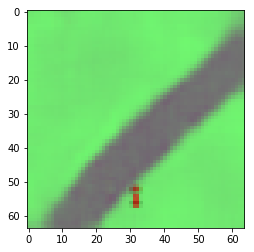

In [57]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

In [41]:
reconstruct_loss(frame, reconstruct)

20.739841

In [ ]:
## MISC 

In [47]:
### Evaluating pretrained VAE model on reconstruction loss
num_samples = 1000 # Evaluating on 1000 takes 3 seconds 
reconstruct_losses = []
for i in range(num_samples):
    frame = random.choice(obs).reshape(1, 64, 64, 3)
    batch_z = vae.encode(frame)
    reconstruct = vae.decode(batch_z)
    r_loss = reconstruct_loss(frame, reconstruct)
    reconstruct_losses.append(r_loss)

In [48]:
# Pretrained VAE tested on our test set 
np.mean(reconstruct_losses)

18.313496

In [49]:
### Evaluating newly trained VAE model on reconstruction loss
num_samples = 1000 # Evaluating on 1000 takes 3 seconds 
reconstruct_losses_new = []
for i in range(num_samples):
    frame = random.choice(obs).reshape(1, 64, 64, 3)
    batch_z = vae_new.encode(frame)
    reconstruct = vae.decode(batch_z)
    r_loss = reconstruct_loss(frame, reconstruct)
    reconstruct_losses_new.append(r_loss)

In [50]:
# Newly trained VAE tested on our test set 
np.mean(reconstruct_losses_new)

1242.8071